In [1]:
%load_ext autoreload
%autoreload 2

import network
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 3
Berechne die relative Perkolationscluster größe für 20 verschiedene $p$ durch Mittelung von jeweils 5 Gittern mit $L=2^{11}$ und trage diese über $(p-p_c)^{5/36}$ auf.

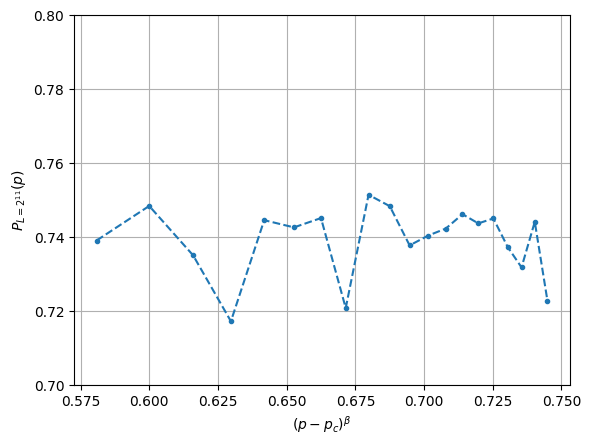

In [23]:
def get_relative_size_of_largest_percolating_cluster(net: network.Network):
    return net.N[net.get_largest_percolating_cluster()] / net.get_total_occupied_spots()

L=2**11
pc = 0.6
beta = 5.0 / 36.0
PL = []
ps = np.linspace(pc+0.02, 0.72, 20)
for p in ps:
    PL2 = []
    for i in range(5):
        net = network.Network(L, L, pc)
        net.hoshen_kopelman()
        PL2.append(get_relative_size_of_largest_percolating_cluster(net))
    PL.append(np.average(PL2))
    
fig, ax = plt.subplots()
ax.plot((ps - pc)**beta, PL, '.--')
ax.set_xlabel('$(p-p_c)^\\beta$')
ax.set_ylabel('$P_{L=2^{11}}(p)$')
ax.set_ylim(0.7, 0.8)
plt.grid(True)

$P_\infty \propto (p-p_c)^{5/36}$ kann nur grob bestätigt werden. \
$P_\infty(p_c)=0$ da bei unendlich großen Gittern es unendlich mehr besetzte Plätze gibt die nicht zum Perkolationscluster gehören.